# Mnist Digit Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load the data
df = pd.read_csv(r'Datasets\digit-recognizer\train.csv')

In [9]:
X_train = df.drop('label', axis=1)
Y_train = df['label']

<Axes: xlabel='label', ylabel='count'>

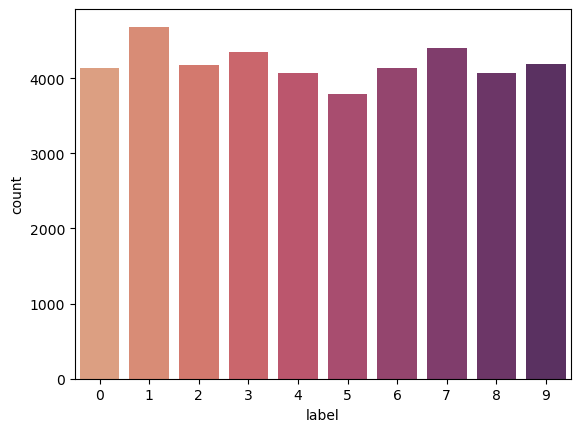

In [10]:
sns.countplot(data = df, x = 'label', palette='flare')

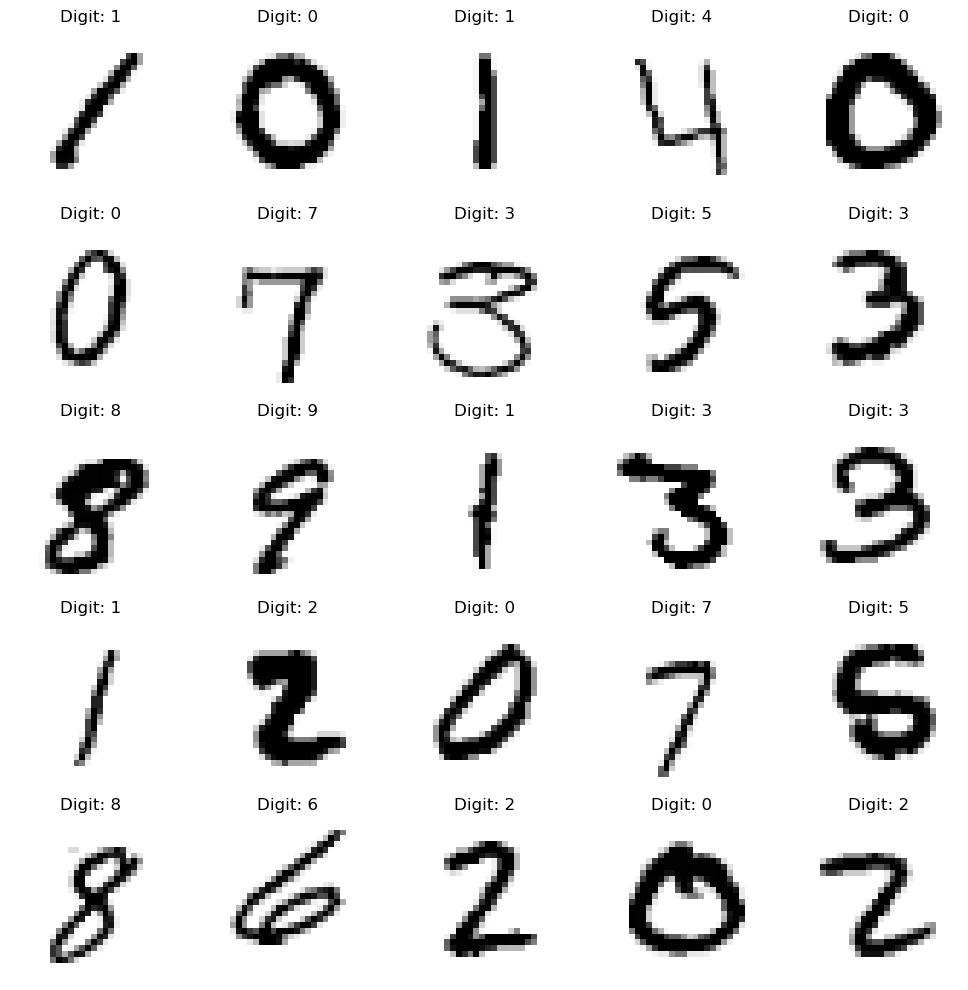

In [11]:
# Reshape the training data to a 28x28 matrix
train_images = df.drop('label', axis=1).values.reshape(-1, 28, 28)

# plot the first 25 digits in the training set
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='binary')
    ax.set_title(f"Digit: {Y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [15]:
# use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [19]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,  32, kernel_size = 5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 5)
        self.drop  = nn.Dropout2d()
        self.fc1   = nn.Linear(320, 100)
        self.fc2   = nn.Linear(100, 10)
        
    def forward(self, x):
        # conv -> maxpool -> relu -> conv -> maxpool -> relu -> fc -> relu -> fc -> softmax
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        x = F.log_softmax(x)
        return x        


In [21]:
network = Net()
network

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [22]:
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]